In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [2]:
%store -r X
%store -r Y
%store -r X_train
%store -r X_test
%store -r Y_train
%store -r Y_test
%store -r X_train_iqr
%store -r X_test_iqr

In [3]:
#uzeto sa vezbi 

def report(model, X, Y, text = "training"):
    Y_pred = model.predict(X)
    
    print("Classification report for model {} on {} data".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(classification_report(Y, Y_pred))
    print("---------------------------------------------------------------------------------")
    print(f'Confusion matrix for {text} set:')
    print(pd.DataFrame(confusion_matrix(Y, Y_pred), columns=['N', 'P'], index=['N', 'P']))
    print("---------------------------------------------------------------------------------")
    print(f"Parameters of model: {type(model).__name__}")
    for k, v in model.get_params().items():
        print(f"{k} : {v}")

In [4]:
dtc = DecisionTreeClassifier()

In [5]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

Text(0.5, 1.0, 'Decision tree of depth 36 with 4867 nodes')

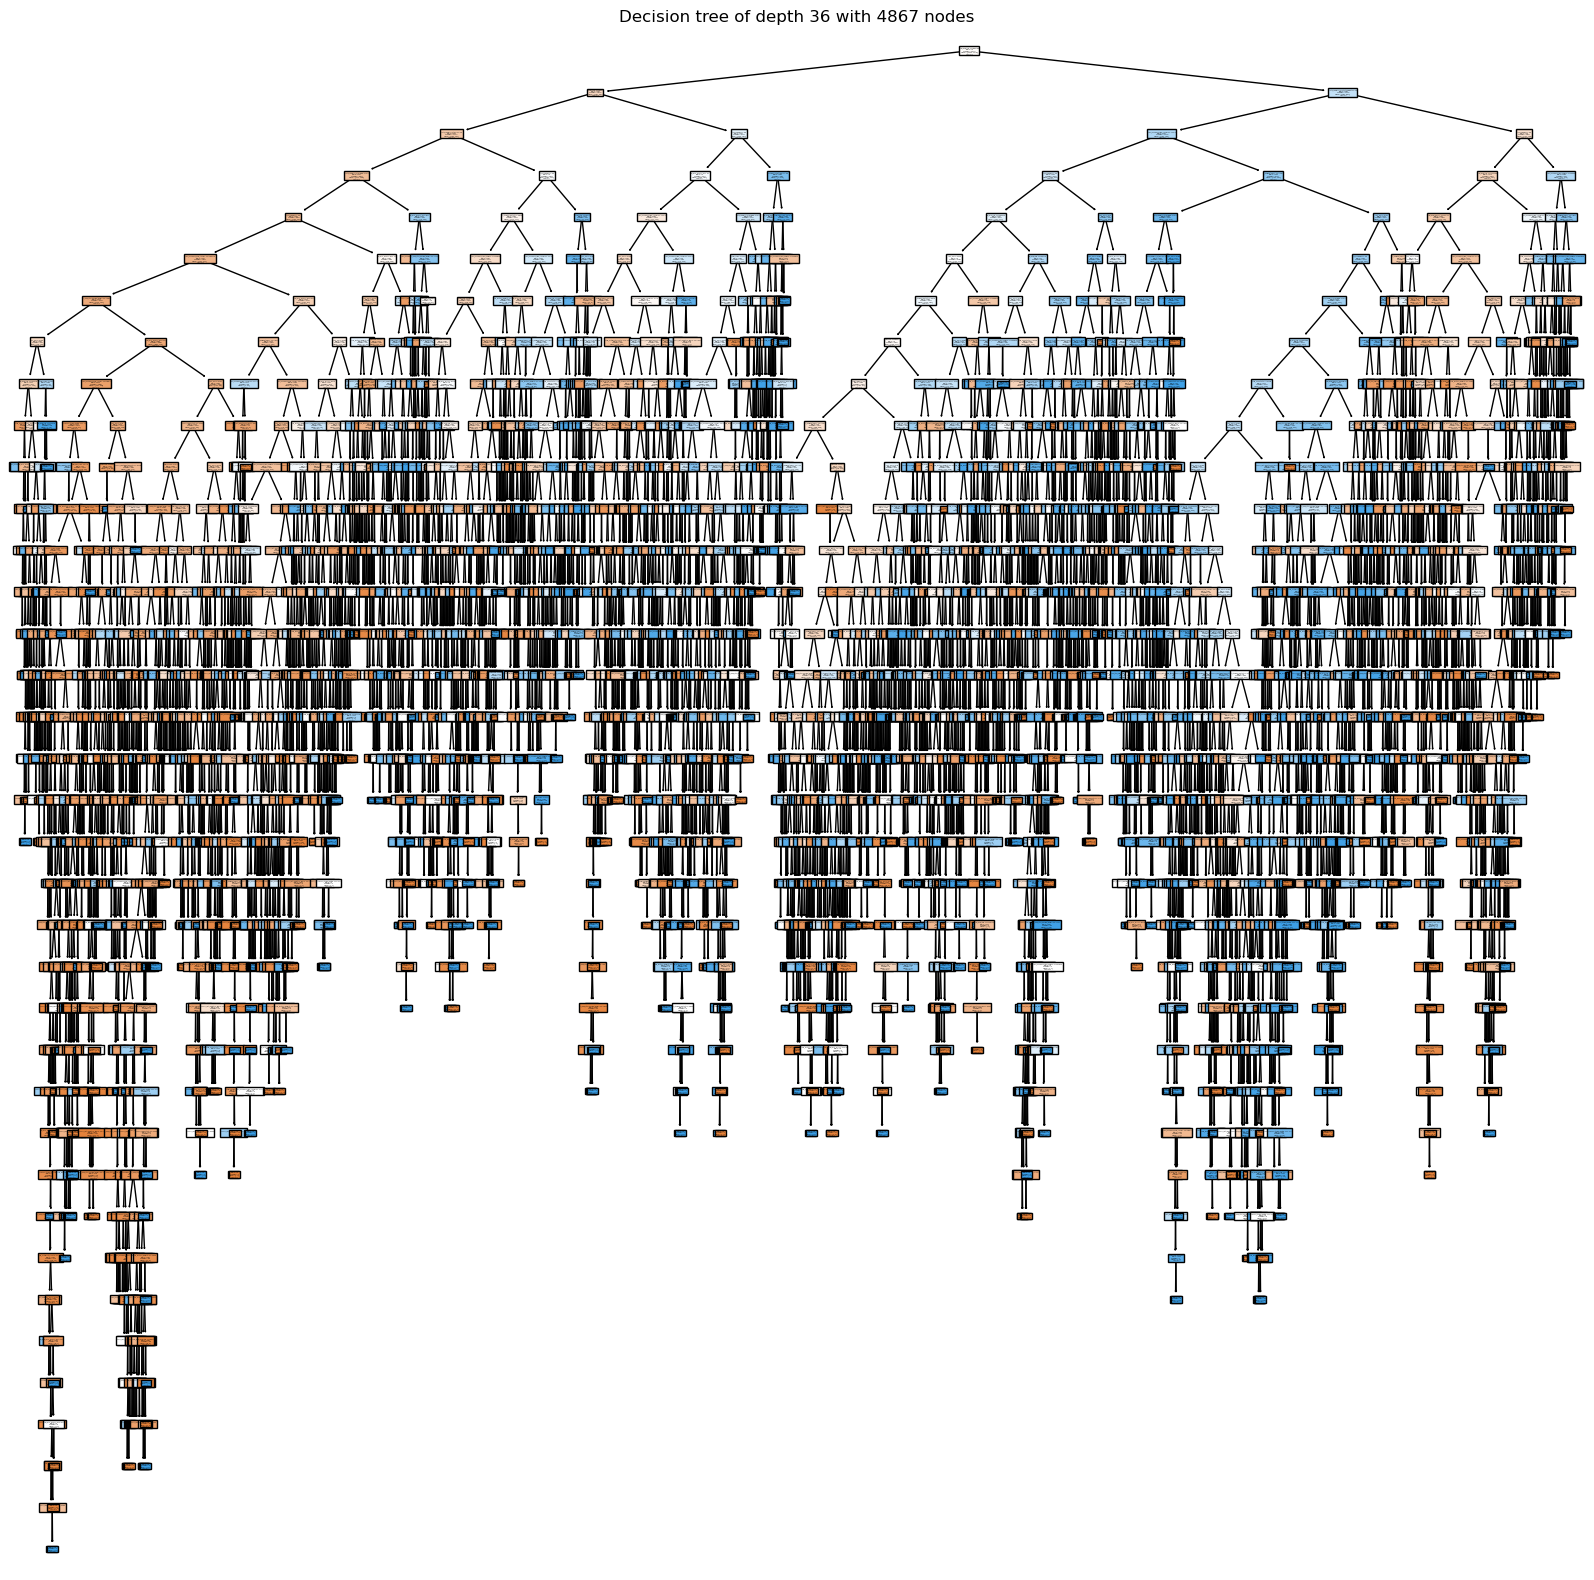

In [6]:
plt.figure(figsize=(20, 20))
plot_tree(dtc, class_names = ['N', 'P'], feature_names = X.columns, filled = True)
plt.title(f"Decision tree of depth {dtc.get_depth()} with {dtc.get_n_leaves()} nodes")

In [7]:
report(dtc, X_train, Y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15005
           1       1.00      1.00      1.00     14728

    accuracy                           1.00     29733
   macro avg       1.00      1.00      1.00     29733
weighted avg       1.00      1.00      1.00     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N      P
N  15005      0
P      0  14728
---------------------------------------------------------------------------------
Parameters of model: DecisionTreeClassifier
ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : None
max_features : None
max_leaf_nodes : None
min_impurity_decrease : 0.0
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
random_state :

In [8]:
report(dtc, X_test, Y_test, 'test')
#overfitting

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.58      0.59      5077
           1       0.57      0.57      0.57      4834

    accuracy                           0.58      9911
   macro avg       0.58      0.58      0.58      9911
weighted avg       0.58      0.58      0.58      9911

---------------------------------------------------------------------------------
Confusion matrix for test set:
      N     P
N  2956  2121
P  2056  2778
---------------------------------------------------------------------------------
Parameters of model: DecisionTreeClassifier
ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : None
max_features : None
max_leaf_nodes : None
min_impurity_decrease : 0.0
min_samples_leaf : 1
min_samples_split : 2
min_weight_fraction_leaf : 0.0
random_state : None
splitter

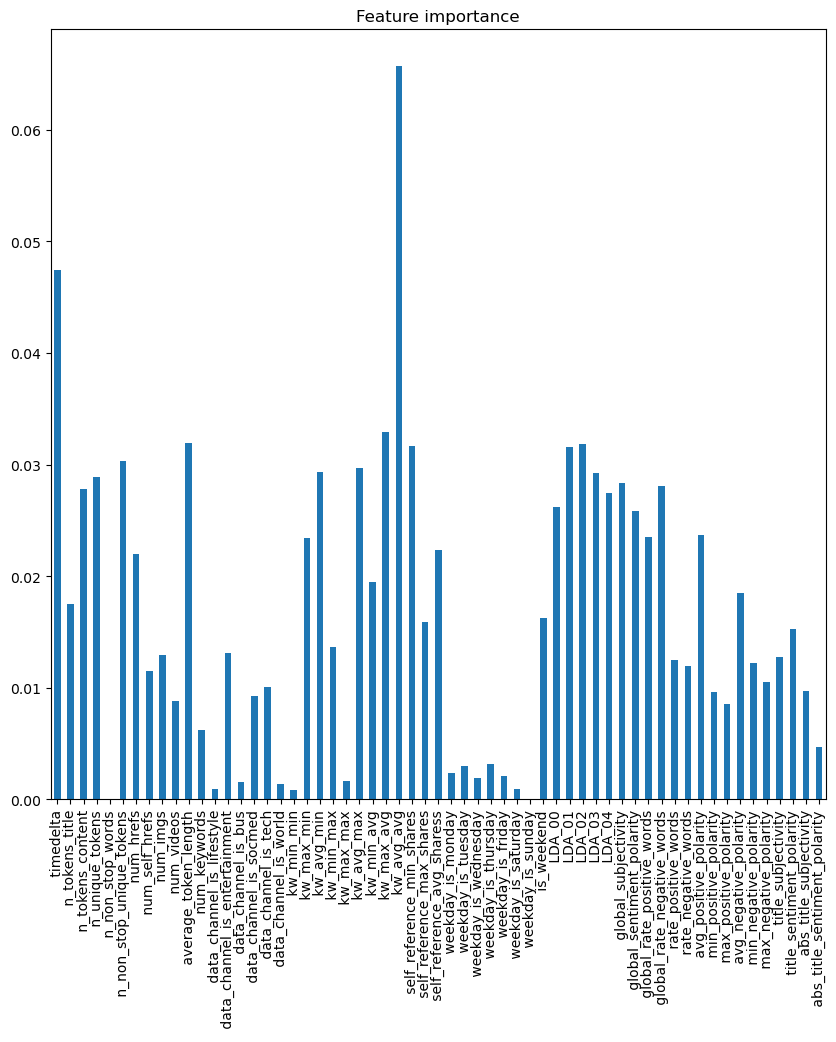

In [9]:
plt.figure(figsize=(10, 10))
pd.Series(dtc.feature_importances_, index = X.columns).plot.bar()
plt.title("Feature importance")
plt.show()

In [10]:
params = {'criterion': ['gini', 'entropy', 'log_loss'],
        'max_depth': range(5, 30, 2),
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2,5,7,10],
        'min_samples_leaf': range(2, 6)}
estimator = GridSearchCV(DecisionTreeClassifier(), param_grid = params, cv = 5)

In [11]:
estimator.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(5, 30, 2),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': [2, 5, 7, 10]})

In [12]:
print(estimator.best_params_)
print(estimator.best_score_)

{'criterion': 'log_loss', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 7}
0.6271817694941939


In [13]:
report(estimator.best_estimator_, X_train, Y_train)
report(estimator.best_estimator_, X_test, Y_test, 'test')

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.69      0.68     15005
           1       0.67      0.65      0.66     14728

    accuracy                           0.67     29733
   macro avg       0.67      0.67      0.67     29733
weighted avg       0.67      0.67      0.67     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N     P
N  10336  4669
P   5141  9587
---------------------------------------------------------------------------------
Parameters of model: DecisionTreeClassifier
ccp_alpha : 0.0
class_weight : None
criterion : log_loss
max_depth : 9
max_features : sqrt
max_leaf_nodes : None
min_impurity_decrease : 0.0
min_samples_leaf : 3
min_samples_split : 7
min_weight_fraction_leaf : 0.0
random_state : N

In [14]:
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 42)
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [15]:
report(random_forest, X_train, Y_train)
report(random_forest, X_test, Y_test, 'test')

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15005
           1       1.00      1.00      1.00     14728

    accuracy                           1.00     29733
   macro avg       1.00      1.00      1.00     29733
weighted avg       1.00      1.00      1.00     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N      P
N  15005      0
P      0  14728
---------------------------------------------------------------------------------
Parameters of model: RandomForestClassifier
bootstrap : True
ccp_alpha : 0.0
class_weight : None
criterion : gini
max_depth : None
max_features : sqrt
max_leaf_nodes : None
max_samples : None
min_impurity_decrease : 0.0
min_samples_leaf : 1
min_samples_split : 2
min_weigh

In [16]:
estimator_halving = HalvingGridSearchCV(dtc, param_grid = params, cv = 3)

In [17]:
estimator_halving.fit(X_train, Y_train)

HalvingGridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
                    param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                                'max_depth': range(5, 30, 2),
                                'max_features': ['sqrt', 'log2'],
                                'min_samples_leaf': range(2, 6),
                                'min_samples_split': [2, 5, 7, 10]})

In [18]:
print(estimator_halving.best_params_)
print(estimator_halving.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
0.6208161865569273


In [19]:
report(estimator_halving, X_train, Y_train)
report(estimator_halving, X_test, Y_test, 'test')

Classification report for model HalvingGridSearchCV on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.72      0.65     15005
           1       0.63      0.49      0.55     14728

    accuracy                           0.61     29733
   macro avg       0.61      0.61      0.60     29733
weighted avg       0.61      0.61      0.60     29733

---------------------------------------------------------------------------------
Confusion matrix for training set:
       N     P
N  10800  4205
P   7492  7236
---------------------------------------------------------------------------------
Parameters of model: HalvingGridSearchCV
aggressive_elimination : False
cv : 3
error_score : nan
estimator__ccp_alpha : 0.0
estimator__class_weight : None
estimator__criterion : gini
estimator__max_depth : None
estimator__max_features : None
estimator__max_leaf_nodes : None
est

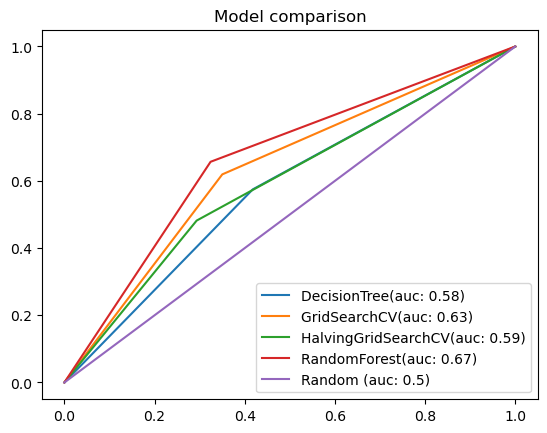

In [20]:
#uzeto sa vezbi

models = [dtc, estimator.best_estimator_, estimator_halving.best_estimator_, random_forest]
model_names = ['DecisionTree', 'GridSearchCV', 'HalvingGridSearchCV', 'RandomForest']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)')
plt.title("Model comparison")
plt.legend()
plt.show()